# Computational Analysis of Mary Shelley's *Frankenstein*

Mary Shelley's *Frankenstein* is an early-19th century English novel that is one of the most influential literary works in the entirely of written human literature. Not only is the novel widely regarded as the first science fiction work in literary history, but also it is a moving commentary on the nature of humanity that was responsible for initiating an important dialogue regarding the consequences and ethical limitations of scientific progress. Within the context of the rapid pace of technological development in the modern twenty-first century, the questions and implications raised by Mary Shelley’s *Frankenstein* are more relevant than ever before. 

*Frankenstein* tells the story of the gifted scientist Dr. Frankenstein who devotes the entirety of his early life to pursuits of science and knowledge rooted in his desire to “explore unknown powers, and unfold to the world the deepest mysteries of creation” (Shelley, 46). Through his knowledge of chemistry, anatomy and the inner workings of electricity, Frankenstein successfully discovers the secret to life and is able to assemble a creature from dead body parts that is capable of the faculties of life and sentience. However, he becomes horrified by the hideousness of the creature as an imperfect specimen, and the monster is rejected by Dr. Frankenstein and mankind. As a result, the sentient monster seeks revenge on Dr. Frankenstein through violence and terror.

Questions for Exploratory Data Analysis:    
I. Using an Latent Dirichlet Allocation (LDA) Topic Model to extract salient terms within *Frankenstein*, what are the most relevant topical concepts and ideas that are represented in the text?   
II. Using computational tools and methods, specifically sentiment analysis, what insights can we derive surrounding Mary Shelly's attitudes towards science and technology?         
III. Using sytolometry analysis, what observations can we make regarding the multiple changes in narrative and heirarchy of narration within *Frankenstein*.

In [1]:
import re
import nltk
import string
import pandas as pd
import pyLDAvis.sklearn 
from collections import Counter
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
from sklearn.decomposition import LatentDirichletAllocation, PCA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

## Load in Corpus

Textual data for Mary Shelley's *Frankenstein* was retreived from the Gutenberg Project, an open-source digital archive containing full texts of books within the public domain. The corpus was generated in Plain Text UTF-8 format from the following [website link](http://www.gutenberg.org/ebooks/84).

In [2]:
# Read in .md file, retrieved from Gutenberg Project
frankenstein = open('frankenstein.md').read()

In [3]:
# Divide the corpus into subsections based on chapter 
cleaned = frankenstein.replace('\n', ' ').replace('_', ' ')
frankenstein_parts = cleaned.split('##')[1:]

In [4]:
# Basic preprocessing steps
lower = frankenstein.lower()
lower = re.sub("“|”|’", "", lower)
for punct in string.punctuation:
    lower = lower.replace(punct, ' ')

In [5]:
#Visualize word frequencies
stop_words = stopwords.words('english')
tokens = nltk.word_tokenize(lower)
filtered_tokens = [w for w in tokens if not w in stop_words] 
word_counter = Counter(filtered_tokens)
#word_counter.most_common(20)

## Latent Dirichlet Allocation (LDA) Topic Modeling

In [6]:
#Remove unhelpful character names from Topic Model
characters = ['Elizabeth', 'Clerval', 'Victor', 'Frankenstein', 'Justine', 'Felix', 'Margaret', 'Safie', 'Agatha', 'Kirwin', 'father']
characterless_frankenstein_parts = []
for part in frankenstein_parts:
    for character in characters:
        part = part.replace(character, '')
    characterless_frankenstein_parts.append(part)

In [7]:
#Initialize LDA Topic Modeling components
countVectorizer = CountVectorizer(stop_words='english')
frankenstein_counts = countVectorizer.fit_transform(characterless_frankenstein_parts)
feature_names = countVectorizer.get_feature_names()
lda = LatentDirichletAllocation(n_components=5)
lda_out = lda.fit_transform(frankenstein_counts)
lda_H = lda.components_

In [8]:
#Output LDA Topic Modeling results
for topic_idx, topic in enumerate(lda_H):
    print("Topic %d:" % (topic_idx))
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))

Topic 0:
shall friend heart death said miserable life happiness eyes night
Topic 1:
science life day time said dear mind natural new saw
Topic 2:
shall man mind make room life time tale said eyes
Topic 3:
life nature shall man friend feelings time mind great human
Topic 4:
man did night eyes said saw time cottage felt life


In [9]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda, frankenstein_counts, countVectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  47.457684
0       51.163364 -159.968018       2        1  24.191017
1      -73.144554   21.523815       3        1  12.217675
3      -66.410133 -110.606438       4        1  11.432388
2       54.417324   12.443444       5        1   4.701236, topic_info=        Term        Freq       Total Category  logprob  loglift
5364   shall   84.000000   84.000000  Default  30.0000  30.0000
3703     man  116.000000  116.000000  Default  29.0000  29.0000
5141    room   26.000000   26.000000  Default  28.0000  28.0000
3568    life   94.000000   94.000000  Default  27.0000  27.0000
3823    mind   69.000000   69.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
2959  horror    2.312361   39.231423   Topic5  -6.4170   0.2261
5228     saw    2.476618   79.991243   Topic5  -6.3483  -0.4177
2869   heart    2.303838   68.806021   Topic5  -6.4207  -0.3394
4015   night    2.241597   81.873415   Topic5  -6.4480  -0.5406
2951    hope    2.157557   41.937984   Topic5  -6.4863   0.0901

[488 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
56        1  0.960337     accents
95        1  0.308992  acquainted
95        3  0.308992  acquainted
95        4  0.432589  acquainted
152       2  0.669240   adversary
...     ...       ...         ...
6693      4  0.195222       years
6693      5  0.027889       years
6701      1  0.778554       young
6701      2  0.037074       young
6701      4  0.148296       young

[909 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 2, 4, 3])

The results of this LDA topic model provide additional insight into the significant topics and areas of emphasis within Mary Shelley's work using computational distant reading practices. The most relevant topic within the scope of the text according to marginal topic distribution is Topic 4, which includes a large amount of action verbs such as 'did', 'said', 'saw', and 'felt', which is logical because these are commonly occuring sentence components within the novel. Notably, the term 'man' appears in this specific topic, as well as in Topic 2 and Topic 3, alongside related terms such as 'human', 'life', and 'nature'. In the novel, Mary Shelley purposefully blurs the line between man and monster, and constantly makes the reader question the nature of humanity and what it means to be human. This observation confirms this important motif throughout the course of the novel.

The second most relevant topic according to marginal topic distribution is Topic 0, which includes notable words such as 'heart', 'death', 'miserable', and 'life', suggesting the prevalence of negative events and occurences within the novel. This supports the tragic nature of the novel and its ominous elements. For more detailed explanation of these events, see Sentiment Analysis. Finally, another significant topic according to marginal topic distribution is Topic 1, which is computationally summarized by the words 'science', 'life', 'mind', and 'natural'. This result supports that an important aspect of Mary Shelley's intentions within the novel is her commentary on the ethics of scientific progress and innovation. Furthermore, it emphasizes the discussions within the novel surrounding human consciousness, sentience, and the notion of natural life and the unnatural Monster. 

## Sentiment Analysis

In [10]:
#Calculate average negative and positive sentiments for each chapter in the novel
avg_neg_score = []
avg_pos_score = []
for part in frankenstein_parts:
    chapter_text = ' '.join(part.split(' ')[3:])
    sentences = nltk.sent_tokenize(chapter_text)
    #Perform sentiment analysis on every sentence and compute a total average 
    scores = [sid.polarity_scores(sentence) for sentence in sentences]
    neg_sentiment = [score.get('neg') for score in scores]
    pos_sentiment = [score.get('pos') for score in scores]
    avg_neg_score.append(sum(neg_sentiment)/len(neg_sentiment))
    avg_pos_score.append(sum(pos_sentiment)/len(pos_sentiment))

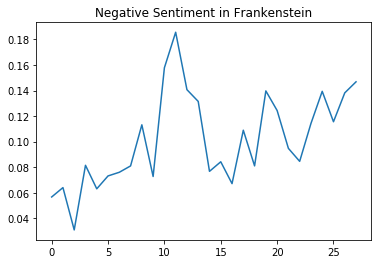

In [11]:
pd.Series(avg_neg_score).plot(title='Negative Sentiment in Frankenstein')

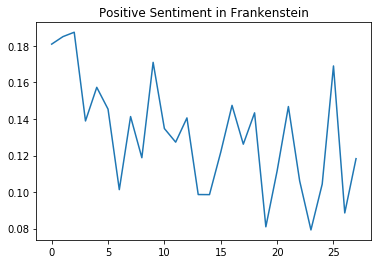

In [12]:
pd.Series(avg_pos_score).plot(title='Positive Sentiment in Frankenstein')

The results of the above sentiment analysis do a good job of highlighting the overall plot development of the novel, as well as critical chapters and important events.     
It is important to note that the x-axis indices from 0-3 correspond to Letters 1-4 written by Captain Walton, while the remaining indices 4-27 correspond to Chapters 1-24 under the narration of Dr. Frankenstein and the Monster. For more detailed explanation of narrative distribution, see Narrative Stylometry below. It is also important to that the the y-axis indices are different for the negative and positive sentiment visualizations, indicating that there is more variation in negative sentiment throughout the course of the novel than positive sentiment.

From the chronological sentiment progress visualizations, we can observe that the passages with the greatest positive sentiment belong within the structure of Captain Walton's initial narration, and his letters to his sister Margaret. This makes sense because Walton is the last tragic character in the novel, while Dr. Frankenstein and the Monster are both surrounded by tragedy and misery. Furthermore, the chapters with the greatest negative sentiment are Chapter 7 and Chapter 8, which both involve the tragic death of Dr. Frankenstein's younger brother William by strangulation, and the sentencing and hanging of the innocent Justine Moritz, respectively. Conversely, the chapters within the main story with the greatest positive sentiment are Chapter 6 and Chapter 22, in which Dr. Frankenstein recieves a heartwarming letter from his romantic interest, and later marries her and embark on a honeymoon, respectively. The increase in negative sentiment towards the ending of the novel computationally reveal that Mary Shelley opts for a sad ending to her literary novel, instead of a happy one.

# Narrative Sylometry

The narration of the novel *Frankenstein* consists of a multi-strand narrative three distinct character's first person points of view at different points in the novel. The novel begins with an epistolary narration from Captain Walton, who is writing a series of letters to his sister Margaret. The point of view then switches to Victor Frankenstein, who tells Walton about his life and how he came to be wandering in the Arctic. When Victor reaches the point in his story where he describes meeting with the Monster, the point of view switches yet again, this time to the Monster, who narrates from a first person perspective, describing his experiences. After that, the point of view returns to Victor, who continues his story. The novel ends with a return to Walton’s point of view and first person narration. In summary:

#### Narrative Distribution in *Frankenstein*:     
Letters 1-4: Captain Walton     
Chapters 1-10: Dr. Frankenstein     
Chapters 11-16: The Monster    
Chapters 17-23: Dr. Frankenstein      
Chapter 24: Dr. Frankenstein and Captain Walton

In [13]:
#Initialize and set up TFIDF Vectorizer 
tfidf_vectorizer = TfidfVectorizer(min_df=1.0, max_features=400, use_idf=False)
frankenstein_freq = tfidf_vectorizer.fit_transform(frankenstein_parts).todense()
frankenstein_word_names = tfidf_vectorizer.get_feature_names()
df = pd.DataFrame(frankenstein_freq, columns=frankenstein_word_names)

In [14]:
#Pass in an index of chapter names, shortened for visualization purposes
chapters = frankenstein.split('##')[1:]
chapter_names = []
for chapter in chapters:
    name = chapter.split('\n')[0].replace('Letter ', 'L').replace('Chapter ', 'C')
    chapter_names.append(name)

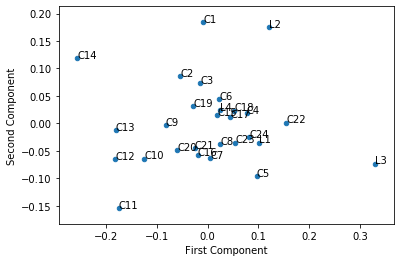

In [15]:
#Perform Principal Component Analysis and plot results
pca = PCA(n_components=2)
frankenstein_reduced = pca.fit_transform(frankenstein_freq)
df = pd.DataFrame(frankenstein_reduced, 
                  columns=['First Component', 'Second Component'],
                  index = chapter_names)
ax = df.plot(kind='scatter', x=0, y=1)
for title, points in df.iterrows():
    ax.annotate(title, points)

The results of the Principal Component Analysis (PCA) indicate a relatively substantial amount of stylometric differences between the three main narrators in the novel: Captain Walton, Dr. Frankenstein, and the Monster. The letters in the novel written by Captain Walton are primarily distributed within the right-hand side of the PCA visualization, with a significant outlier being Letter 3, specifically. I suspect this to be the case due to the fact that Letter 3 is the shortest section in the entirety of the novel. As a result, this brevity perhaps reduces the accuracy of the stylometric analysis, to some extent, due to limited sample size and potential for rigorous computational analysis. Alternatively, from a close reading perspective, Letter 3 includes a relatively large amount of interrogative sentences, directed towards Captain Walton's sister, Mrs. Saville, the recipient of the letters, which makes it stylometrically unique when compared to other subsections of the novel. Some combination of the two is a likely explanation for this observation.

Furthermore, within the context of the narration performed by Dr. Frankenstein, there is a considerably observable clustering pattern towards the mid-central region of the PCA visualization, with a noticeable outlier being Chapter 1, specifically. Given that the introductory chapter to the novel is a critical chapter that focuses on character introduction, background description, and contextual information, I believe that is it stylometrically unique when compared to other chapters in the novel which are more dominantly focused on developments in plot, primarily, than character details or attributions of introductory, informative nature. 

Finally, the chapters in the novel narrated from the Monster's first person perspective are generally distributed in the far left-hand side of the PCA visualization, with Chapter 15 and Chapter 16 being distributed closer to the mid-central region among Dr. Frankenstein's narrative components. In the initial chapters of the Monster's narration, there is a significant depature from Dr. Frankenstein's narrative in that the Monster discusses his earliest memories, describing a string of sad and violent events that induces a somewhat sympathetic response from the reader. I believe that Chapter 15 and Chapter 16, specifically, are distributed closer to Dr. Frankenstein's narrative components because at that point in the novel, the story overlaps with certain elements of Dr. Frankenstein's narration, and the mysteries surrounding the events that occurred in those chapters are finally resolved.

# Conclusion

This project was inspired by my personal interest in Mary Shelley's *Frankenstein*, as one of my favorite novels of all time. In the future, I would like to explore developments in plot on a deeper level through social network analysis. Furthermore, I would like to further explore the speech patterns of the Monster and Dr. Frankenstein on a deeper level through word embeddings, language bias, and sentence structures, since I am interested in observing how unique the Monster's language patterns are given his abnormal acquisition of language. 

Based on the results of the performed computational text analysis, not only is *Frankstein* an important commentary on the ethics of scientific progress and discovery, but also it is a reflective analysis on the nature of humanity, life, and human consciousness. The relative negative sentiment within the novel and its conclusion supports the interpretation that Shelley encapsulated her own general fears and reservations regarding scientific progress through the fictional story of Victor Frankenstein and his ill-fated creation of science. Her use of a multi-strand narrative similar to Wilkie Collin's *The Moonstone* also increase the reader's interest through variations in stylometry that introduce multiple perspectives that obfuscate the notion of who the real villian is in the novel. Ultimately, the distant reading computational tools and techniques used within this inquiry helped reveal invaluable insight into Mary Shelley's motivations and stylistic choices within *Frankenstein*, and supplemented my close reading interpetations with more concrete, distant reading computational findings.